Tanmay Jagtap  
LGMVIP DataScience  
Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset
df = pd.read_csv("NSE-TATAGLOBAL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Short-Analysis

In [4]:
df.shape

(2035, 8)

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


In [9]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [10]:
df1=df.reset_index()['Close']
df1.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

# Data Visualization

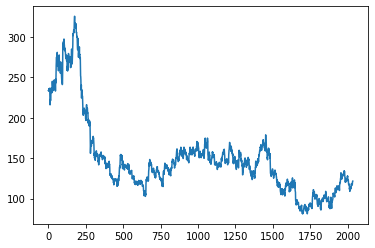

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

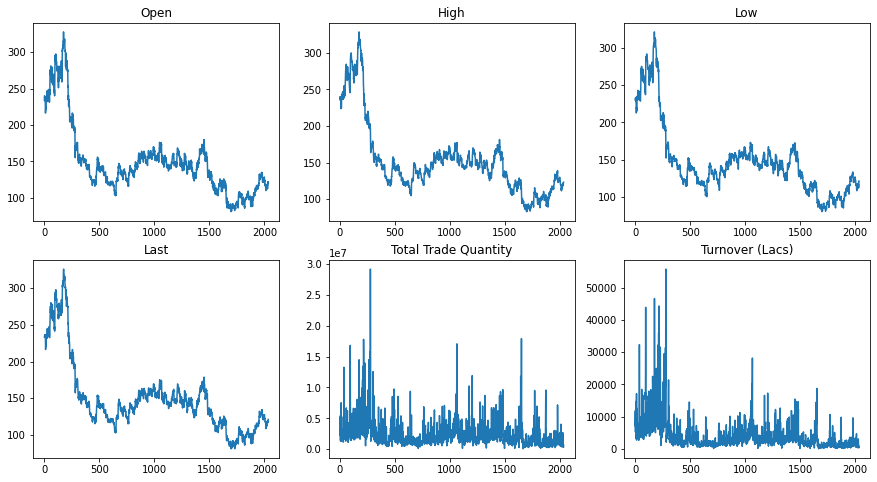

In [12]:
#The figure below show the graph for different parameters like Open, High,etc w.r.t. Time
figure,axis = plt.subplots(2,3,figsize=(15,8))
cols = list(df.columns[1:])
cols.remove('Close')
k=0
for i in range(2):
    for j in range(3):
        axis[i,j].plot(df[cols[k]])
        axis[i,j].set_title(cols[k])
        k+=1
plt.show()

# Data Preprocessing

In [13]:
#Selecting the parameters which will be considered for training the model
selected_feat = ['Open','High','Low','Total Trade Quantity','Turnover (Lacs)']
selected_feat

['Open', 'High', 'Low', 'Total Trade Quantity', 'Turnover (Lacs)']

Using MinMaxScaler to scale the features in range of [0,1] as LSTM gets affected by large values

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler(feature_range=(0,1))
df1 = scaler1.fit_transform(df[selected_feat])
df1 = pd.DataFrame(df1,columns=selected_feat)
df1.head()

,Open,High,Low,Total Trade Quantity,Turnover (Lacs)
0,0.620235,0.622688,0.621560,0.103951,0.127882
1,0.622263,0.626144,0.625285,0.173002,0.212192
2,0.644363,0.639154,0.631078,0.075513,0.093535
3,0.617194,0.625940,0.629009,0.079233,0.098117
4,0.618208,0.635902,0.623836,0.116080,0.142907


In [15]:
scaler2 = MinMaxScaler(feature_range=(0,1))
df2 = scaler2.fit_transform(np.array(df['Close']).reshape(-1,1))
df2 = pd.DataFrame(df2,columns=['Close'])
df2.head()

,Close
0,0.624183
1,0.622141
2,0.626225
3,0.633783
4,0.622345


Using TimeSeriesSplit to split the data into training and test data

In [16]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 15)
for train_index, test_index in tss.split(df1):
        X_train, X_test = df1[:len(train_index)], df1[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = df2[:len(train_index)].values.ravel(), df2[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [17]:
Xtrain = np.array(X_train)
Xtest = np.array(X_test)
X_train.shape,X_test.shape

((1908, 5), (127, 5))

In [18]:
X_train = Xtrain.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = Xtest.reshape(X_test.shape[0],1,X_test.shape[1])
X_train.shape,X_test.shape

((1908, 1, 5), (127, 1, 5))

# Training Model Using LSTM

In [19]:
#Importing the Libraries for model training
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [20]:
#Building the Model
model = Sequential()
model.add(LSTM(20, return_sequences = False, input_shape = (1,Xtrain.shape[1])))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose = 1) #training the model

Epoch 1/100
30/30 [==============================] - 5s 3ms/step - loss: 0.0709
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0259
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 7.4254e-04
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 5.1438e-04
Epoch 11/100
30/30 [==============================] - 0s 3ms/step - loss: 3.9273e-04
Epoch 12/100
30/30 [==============================] - 0s 3ms/step - loss: 3.2439e-04
Epoch 13/100
30/30 [=

30/30 [==============================] - 0s 3ms/step - loss: 6.6119e-05
Epoch 98/100
30/30 [==============================] - 0s 3ms/step - loss: 6.6088e-05
Epoch 99/100
30/30 [==============================] - 0s 4ms/step - loss: 6.5784e-05
Epoch 100/100
30/30 [==============================] - 0s 3ms/step - loss: 6.5567e-05


# Predicting Data Using LSTM Model

In [23]:
#Predicting the test values using the testing values
y_pred = model.predict(X_test)
y_pred

array([[0.09978551],
       [0.10067949],
       [0.10282829],
       [0.09196389],
       [0.0882095 ],
       [0.09305089],
       [0.10492382],
       [0.12020231],
       [0.12539224],
       [0.12801322],
       [0.12843667],
       [0.11720541],
       [0.11007977],
       [0.11517605],
       [0.11727554],
       [0.11680412],
       [0.12545823],
       [0.1284951 ],
       [0.131004  ],
       [0.13862388],
       [0.14324524],
       [0.1365688 ],
       [0.13434246],
       [0.13651843],
       [0.13188066],
       [0.12891343],
       [0.11970999],
       [0.13276543],
       [0.13577153],
       [0.13647869],
       [0.13390419],
       [0.13591237],
       [0.1409737 ],
       [0.13423927],
       [0.12771013],
       [0.12681672],
       [0.11694169],
       [0.13620356],
       [0.14759535],
       [0.14484309],
       [0.1541403 ],
       [0.15993436],
       [0.1580982 ],
       [0.17180258],
       [0.17642929],
       [0.18660752],
       [0.20305344],
       [0.197

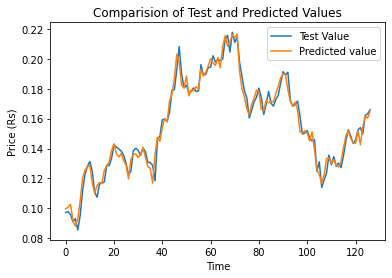

In [24]:
#Comparing the test and predicted values
plt.plot(y_test, label = 'Test Value')
plt.plot(y_pred, label = 'Predicted value')
plt.title('Comparision of Test and Predicted Values')
plt.xlabel('Time')
plt.ylabel('Price (Rs)')
plt.legend()
plt.show()

In [25]:
#Getting the original values using inverse_transform
y_pred = scaler2.inverse_transform(y_pred)
y_pred

array([[105.377495],
       [105.59634 ],
       [106.12237 ],
       [103.46276 ],
       [102.543686],
       [103.72886 ],
       [106.63535 ],
       [110.37553 ],
       [111.64602 ],
       [112.287636],
       [112.3913  ],
       [109.641884],
       [107.89753 ],
       [109.145096],
       [109.65905 ],
       [109.54365 ],
       [111.66217 ],
       [112.4056  ],
       [113.01978 ],
       [114.885124],
       [116.01643 ],
       [114.38204 ],
       [113.837036],
       [114.36971 ],
       [113.23438 ],
       [112.50801 ],
       [110.255005],
       [113.45097 ],
       [114.18687 ],
       [114.359985],
       [113.729744],
       [114.221344],
       [115.46036 ],
       [113.81177 ],
       [112.21344 ],
       [111.994736],
       [109.577324],
       [114.29263 ],
       [117.081345],
       [116.407585],
       [118.68354 ],
       [120.10193 ],
       [119.652435],
       [123.00727 ],
       [124.139885],
       [126.63152 ],
       [130.65747 ],
       [129.3